In [17]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [8]:
df = data('swiss')

In [10]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


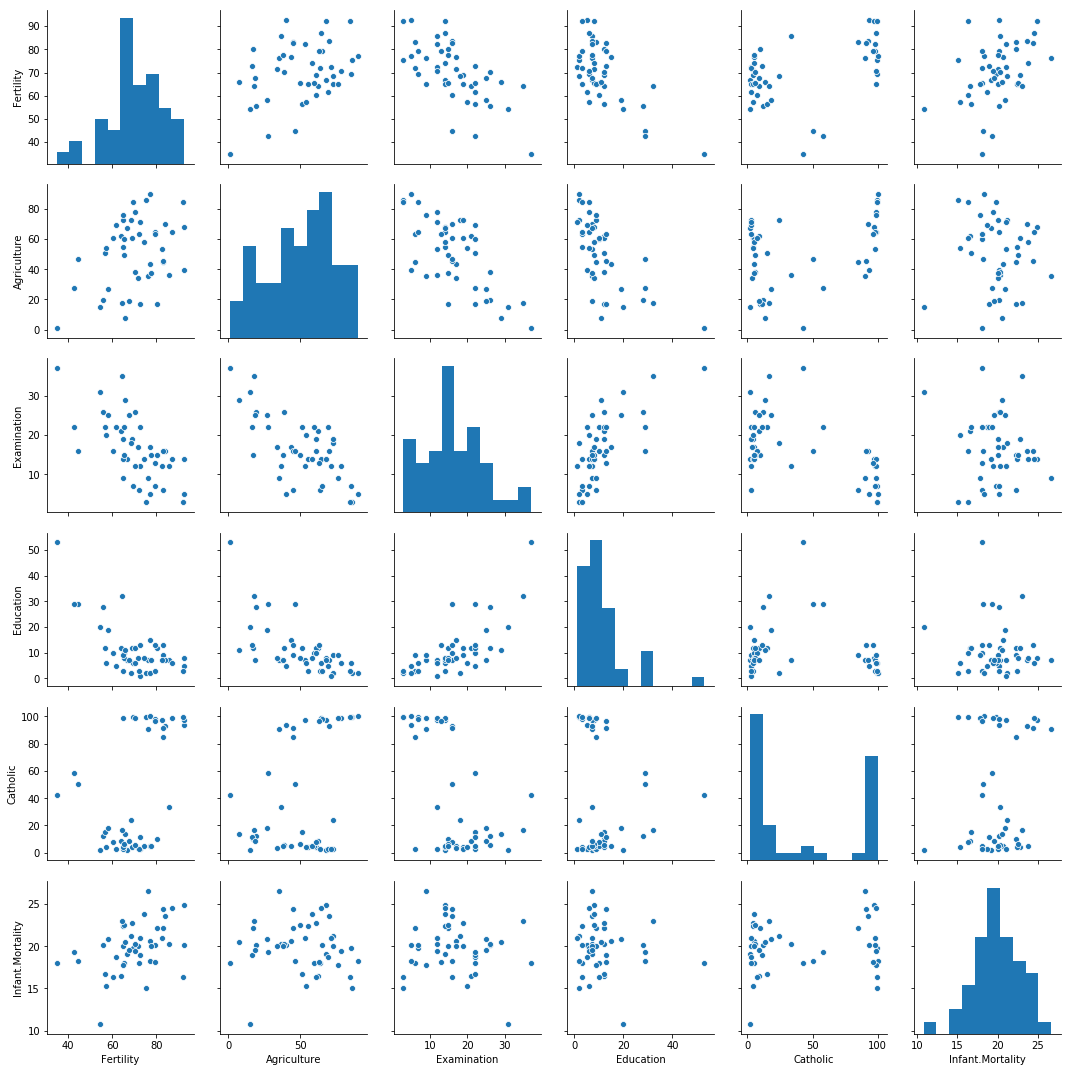

In [13]:
sns.pairplot(df)

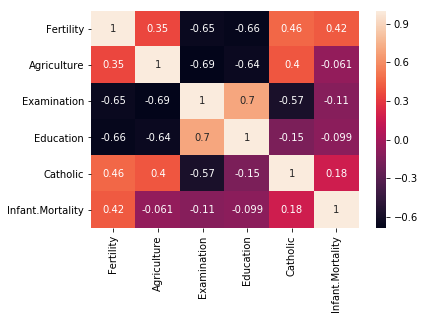

In [16]:
sns.heatmap(df.corr(), annot=True)

In [18]:
X = df.drop(columns='Fertility')
y = df[['Fertility']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

In [20]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality', 'Fertility']
Train dimensions (rows, columns): (37, 6)


In [21]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality', 'Fertility']
Test dimensions (rows, columns): (10, 6)


In [22]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.79
Test Split: 0.21


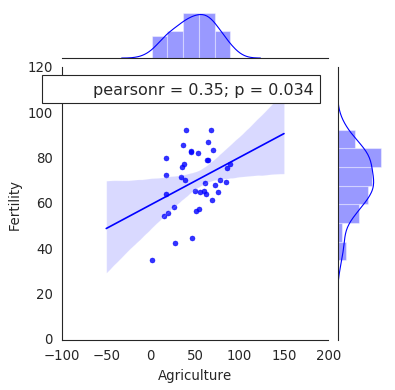

In [23]:
with sns.axes_style('white'):
    j = sns.jointplot("Agriculture", "Fertility", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

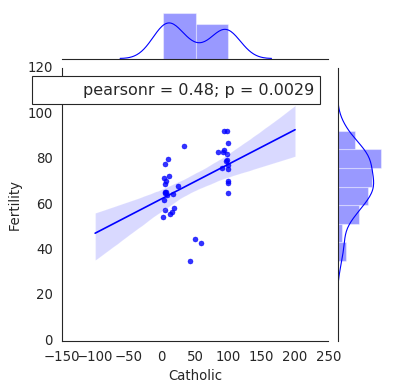

In [24]:
with sns.axes_style('white'):
    j = sns.jointplot("Catholic", "Fertility", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

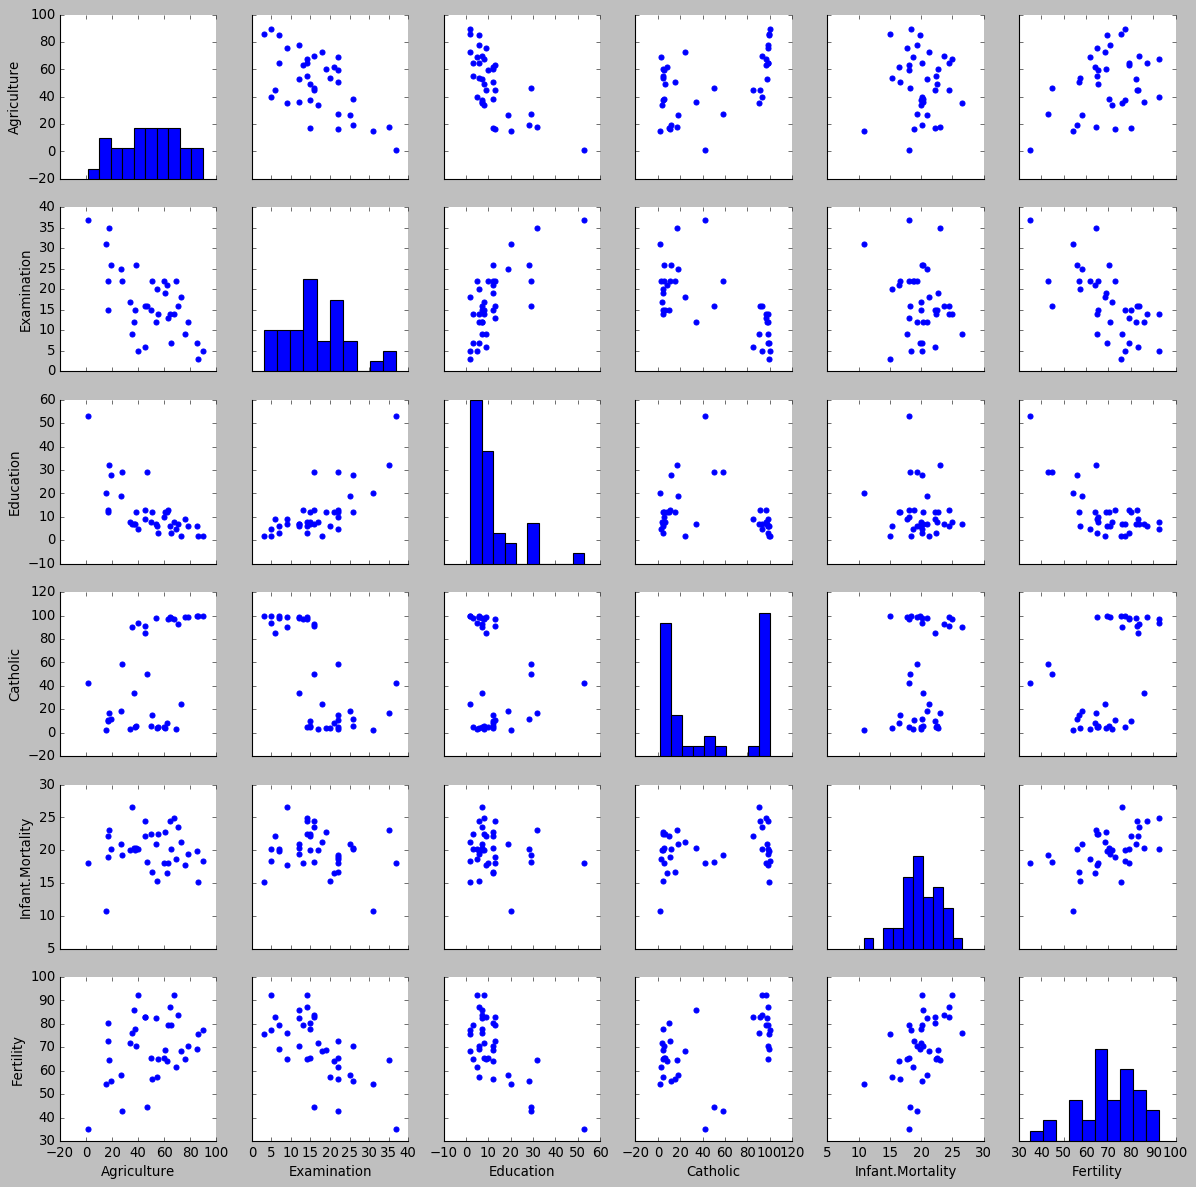

In [25]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

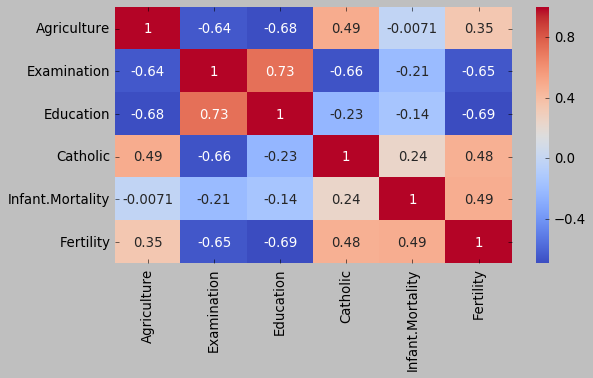

In [26]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True)

In [28]:
[[column, pearsonr(train[column], train.Fertility)] for column in X_train] 

[['Agriculture', (0.35010683581243957, 0.033647465098916536)],
 ['Examination', (-0.651406854748313, 1.2625310022438987e-05)],
 ['Education', (-0.6943565186692973, 1.8716642990510039e-06)],
 ['Catholic', (0.47562742143193626, 0.0029278952602319)],
 ['Infant.Mortality', (0.4870350554675432, 0.0022354919503959655)]]

In [29]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.Fertility) for col in column_names]

exam_final_corr_dict = dict(zip(column_names, r_and_p_values))
exam_final_corr_dict

{'Agriculture': (0.35010683581243957, 0.033647465098916536),
 'Examination': (-0.651406854748313, 1.2625310022438987e-05),
 'Education': (-0.6943565186692973, 1.8716642990510039e-06),
 'Catholic': (0.47562742143193626, 0.0029278952602319),
 'Infant.Mortality': (0.4870350554675432, 0.0022354919503959655)}

In [30]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Fertility   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     395.4
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           9.06e-28
Time:                        09:22:20   Log-Likelihood:                -133.67
No. Observations:                  37   AIC:                             277.3
Df Residuals:                      32   BIC:                             285.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Agriculture         -0.0118      0.097     -0.122      0.903      -0.209       0.185
Examination          0.9155      0.411      2.227      0.033       0.078       1.753
Education           -1.0676      0.315     -3.392      0.002      -1.709      -0.427
Catholic             0.1760      0.067      2.627      0.013       0.040       0.312
Infant.Mortality     2.9252      0.339      8.625      0.000       2.234       3.616
==============================================================================
Omnibus:                        1.298   Durbin-Watson:                   2.949
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.147
Skew:                           0.255   Prob(JB):                        0.564
Kurtosis:                       2.305   Cond. No.                         28.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
lm2 = LinearRegression()
lm2.fit(X_train[['Agriculture', 'Catholic']], y_train.Fertility)
print(lm2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [65]:
lm2a = LinearRegression()
lm2a.fit(X_train[['Education', 'Examination']], y_train.Fertility)
print(lm2a)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [66]:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coefficients = lm2.coef_
print(lm2_coefficients)

lm2a_y_intercept = lm2a.intercept_
print(lm2_y_intercept)

lm2a_coefficients = lm2a.coef_
print(lm2a_coefficients)

59.143528762889616
[0.09090975 0.12794134]
59.143528762889616
[-0.60108465 -0.50800823]


In [68]:
y_pred_lm2 = lm2.predict(X_train[['Agriculture', 'Catholic']])
y_pred_lm2a = lm2a.predict(X_train[['Education', 'Examination']])

In [69]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2)) 

mse_lm2a = mean_squared_error(y_train, y_pred_lm2a)
print("lm2a\n  mse: {:.3}".format(mse_lm2a)) 

lm2
  mse: 1.32e+02
lm2a
  mse: 82.8


In [70]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in the person''s Fertility canbe explained by Agriculture and Catholic.'.format(r2_lm2))

r2_lm2a = r2_score(y_train, y_pred_lm2a)
print('  {:.2%} of the variance in the person''s Fertility can be explained by Education and Examination.'.format(r2_lm2a))

  24.37% of the variance in the persons Fertility canbe explained by Agriculture and Catholic.
  52.57% of the variance in the persons Fertility can be explained by Education and Examination.


Text(0.5, 1.0, 'Predicted vs Actual Fertility')

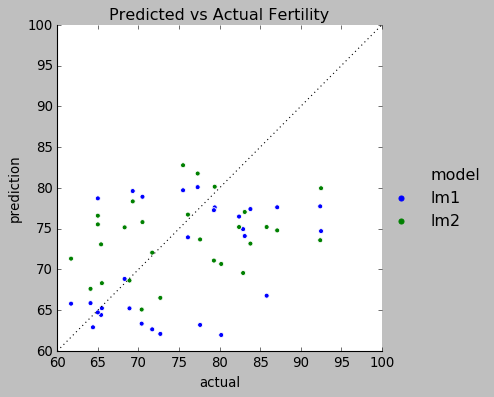

In [48]:
pd.DataFrame({'actual': y_train.Fertility,
              'lm1': y_pred_lm2.ravel(),
              'lm2': y_pred_lm2a.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Fertility')

In [49]:
y_pred_lm2a = lm2a.predict(X_test[['Education', 'Examination']])
mse = mean_squared_error(y_test, y_pred_lm2a)

print("Mean squared error: %.2f" % mse)


Mean squared error: 50.05


In [50]:
r2 = r2_score(y_test, y_pred_lm2a)

print('{:.2%} of the variance in the person''s Fertility can be explained by Education and Examination.'
      .format(r2))

28.30% of the variance in the persons Fertility can be explained by Education and Examination.


Text(0, 0.5, 'Residuals')

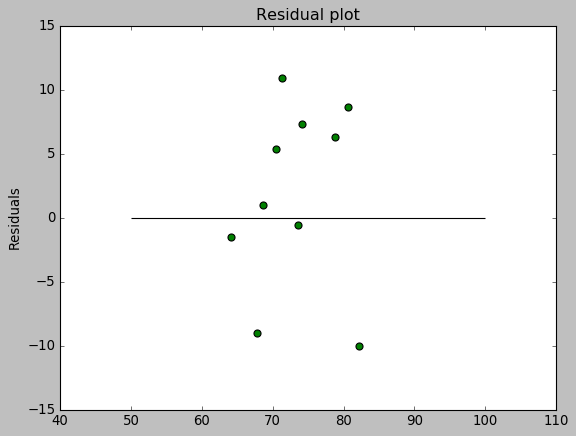

In [51]:
plt.scatter(y_pred_lm2a, y_pred_lm2a - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

In [52]:
lm3 = LinearRegression()
lm3.fit(X_train, y_train)
print(lm3)
lm3_y_intercept = lm3.intercept_
print(lm3.intercept_)
lm3_coefficients = lm3.coef_
print(lm3.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[64.49714106]
[[-0.28365586  0.2769181  -1.25945212  0.16989921  1.07574721]]


In [56]:
y_pred_lm3 = lm3.predict(X_train)
mse_lm3 = mean_squared_error(y_train, y_pred_lm3)
print("lm3\n  mse: {:.3}".format(mse_lm3))

lm3
  mse: 38.4


In [58]:
r2_lm3 = r2_score(y_train, y_pred_lm3)
print('  {:.2%} of the variance in the person''s Fertility by all independent variables.'.format(r2_lm3))

  78.02% of the variance in the persons Fertility by all independent variables.


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

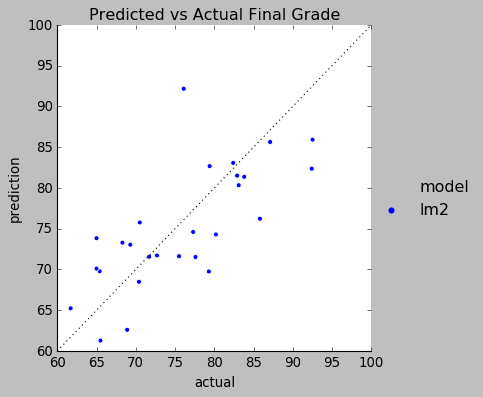

In [61]:
pd.DataFrame({'actual': y_train.Fertility,
#               'lm1': y_pred_lm3.ravel(),
              'lm2': y_pred_lm3.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

plt.plot([60, 100], [60, 100], c='black', ls=':')
plt.ylim(60, 100)
plt.xlim(60, 100)
plt.title('Predicted vs Actual Final Grade')